### Linear Regression

Linear Regression (hồi quy tuyến tính) là một thuật toán có giám sát (Supervised learning) trong Machine Learning, nó là một phương pháp thống kê dùng để ước lượng mối quan hệ giữa các biến độc lập (input features) và biến phụ thuộc (output target). Linear Regression giả định rằng sự tương quan giữa các biến là tuyến tính, từ đó tìm ra hàm tuyến tính tốt nhất để biểu diễn mối quan hệ này. Thuật toán này dự báo giá trị của biến output từ các giá trị của biến đầu vào.

### Các loại Linear Regression
Có hai loại chính của Linear Regression:

    1. Simple Linear Regression: Mô hình này chỉ có một biến độc lập (input feature) mô tả mối quan hệ tuyến tính giữa biến phụ thuộc (output target) và biến độc lập. Phương trình của Simple Linear Regression có dạng y = a + bx + c trong đó a là điểm giao với trục tung (chỉ số độc lập), b là hệ số góc (độ dốc) của đường thẳng, c là sai số.

    2. Multiple Linear Regression: Mô hình này có nhiều hơn một biến độc lập, biểu diễn mối quan hệ tuyến tính giữa các biến độc lập và biến phụ thuộc. Phương trình của Multiple Linear Regression có dạng y = a + b1x1 + b2x2 + ... + bnxn + c, trong đó a là điểm giao với trục tung, b1,b2,...,bn là các hệ số góc, và c là sai số.

### Mục tiêu của Linear Regression
Mục tiêu của Linear Regression là tìm ra hệ số góc và điểm giao với trục tung sao cho hàm dự đoán tuyến tính đạt được sai số nhỏ nhất. Một trong những cách phổ biến để ước lượng các hệ số là sử dụng phương pháp Ordinary Least Squares (OLS), trong đó chúng ta cần tối thiểu hóa tổng bình phương sai số (sum of squared error).

### Ứng dụng của Linear Regression
Linear Regression được ứng dụng rộng rãi trong nhiều lĩnh vực như:

    + Dự báo giá cả: dự đoán giá nhà, cổ phiếu, nhiên liệu dựa trên các yếu tố như vị trí, kích thước, chất lượng, lượng cung cầu,...
    
    + Dự báo điểm số: dự đoán điểm số của học sinh dựa trên thời gian học, nỗ lực, kỹ năng, trình độ giáo viên,...

    + Dự báo sản phẩm: dự đoán đầu ra sản xuất dựa trên thời gian, công suất, nguyên liệu, lao động,...

    + Phân tích chuỗi thời gian: dự đoán xu hướng và chu kỳ của các chuỗi dữ liệu, như bất động sản, thời tiết, xu hướng sản xuất,...

In [3]:
%pip install matplotlib

  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp313-cp313-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl (2.7 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
%pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
df=pd.read_csv('car data.csv')

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Text(0, 0.5, 'Present_Price')

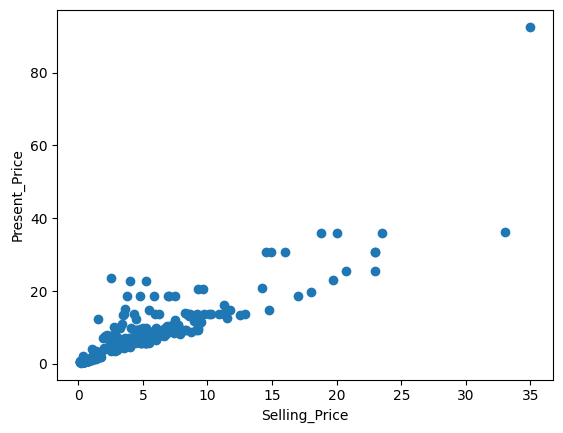

In [10]:
## scatter plot
plt.scatter(df['Selling_Price'],df['Present_Price'])
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')

In [12]:
## Correlation
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [14]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


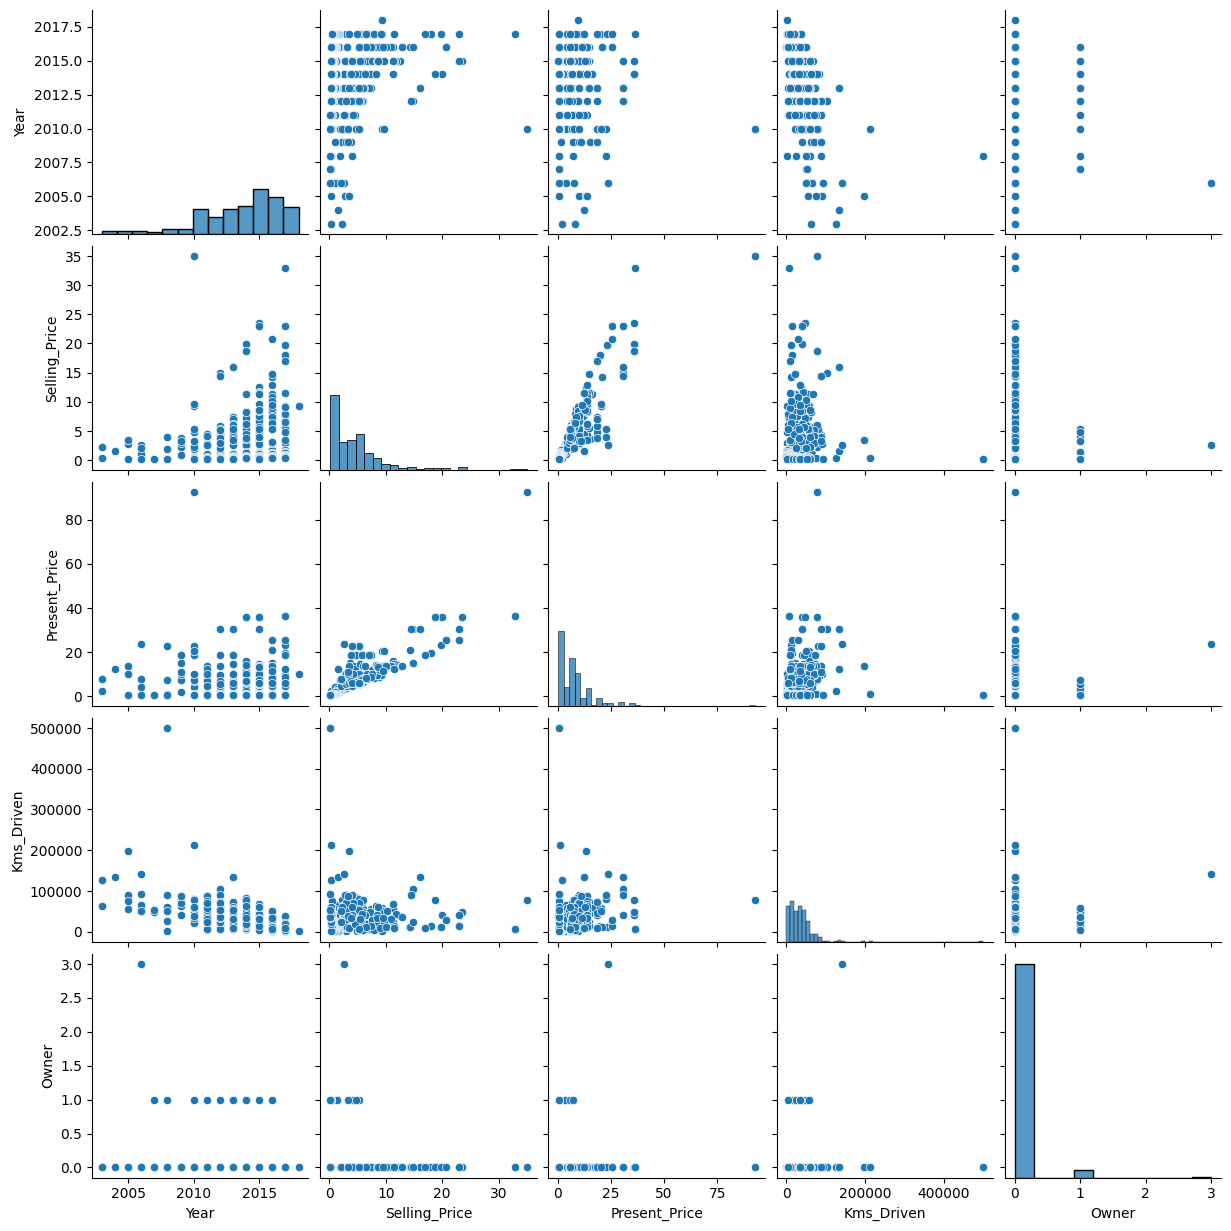

In [15]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [16]:
## Independent and dependent features
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
## Independent and dependent features
X=df[['Selling_Price']] ### independent features should be data frame or 2 dimensionalarray
y=df['Present_Price'] ### This 
X.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [25]:
X_series=df['Selling_Price']
np.array(X_series).shape

(301,)

In [27]:
y

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [28]:
np.array(y).shape

(301,)

In [33]:
%pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl (41.0 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
## Train Test Split
from sklearn.model_selection import train_test_split


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
X_train.shape

(225, 1)

In [38]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_test

array([[-0.84908045],
       [ 1.0968803 ],
       [ 0.06807318],
       [-0.88895669],
       [ 0.46683563],
       [ 0.56652624],
       [-0.69954453],
       [-0.81917327],
       [-0.82914233],
       [ 0.27742347],
       [ 0.92541244],
       [-0.69954453],
       [ 0.5764953 ],
       [-0.83911139],
       [ 0.30733065],
       [-0.39050363],
       [-0.72945172],
       [ 2.47061693],
       [-0.82316089],
       [-0.5799158 ],
       [-0.83512376],
       [ 0.74596934],
       [ 0.14782567],
       [-0.32072021],
       [-0.79923514],
       [-0.17118429],
       [ 0.07804224],
       [-0.39050363],
       [-0.67960641],
       [-0.67960641],
       [-0.78926608],
       [ 0.72603122],
       [-0.82914233],
       [-0.53007049],
       [ 0.62634061],
       [-0.19112241],
       [ 0.17773285],
       [-0.16121523],
       [-0.34065833],
       [ 0.02819694],
       [-0.21903578],
       [-0.61979204],
       [-0.02164837],
       [-0.83512376],
       [ 0.37711408],
       [-0

In [43]:
## Apply Simple Linear Regression

from sklearn.linear_model import LinearRegression

In [49]:
regression=LinearRegression(n_jobs=-1)

In [50]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print("Coefficient or slope:", regression.coef_)
print("Intercept:", regression.intercept_)

array([7.81541479])